# Problem set 3 - Symmetric input-output tables

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
#import your data
df = pd.read_excel (r'IOweek3data.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
df

FileNotFoundError: [Errno 2] No such file or directory: 'IOweek3data.xlsx'

In [70]:
#Define Z (Interindustry Matrix)
Z = df.iloc[1:18] # first select relevant rows
Z = Z.iloc[:, 0:21] # select relevant columns
Z = Z.drop(df.columns[[1, 2, 3]], axis=1) #drop irrelevant columns
Z = Z.set_index('Unnamed: 0') #reset index
Z

,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Unnamed: 0,,,,,,,,,,,,,,,,,
Agriculture,497101.912889,26058.023206,1.125212e+06,69121.693315,82155.081288,8.404635e+04,6.607835e+03,9.965651e+03,4.674536e+03,9174.639170,13304.950469,1.682228e+04,132834.508695,3.217192e+04,1024.142474,4.801851e+04,7.830974e+04
Mining,8823.988385,272347.144637,2.678022e+04,9165.218348,12791.216035,1.116892e+06,6.076977e+05,3.565131e+04,1.459829e+04,18377.802613,209660.555427,1.289983e+05,7981.460299,1.112941e+04,1727.611567,5.411941e+04,7.040630e+04
Food,139863.036507,7674.908334,5.641210e+05,28298.790138,5951.844510,4.632331e+04,7.721564e+03,7.069602e+03,2.437356e+03,3339.934946,6251.813186,6.003470e+03,234897.020335,7.716471e+03,1318.229456,2.210003e+04,1.782807e+05
Textiles,5842.663574,2026.044361,5.129615e+03,576147.542292,13028.823277,3.582095e+04,5.817044e+03,1.518631e+04,2.024097e+04,35458.836469,2665.178464,1.453648e+04,10998.770175,5.884372e+03,543.787061,2.871027e+04,5.722477e+04
Wood prod,8261.586543,2838.100776,8.483314e+04,21637.565833,413902.001723,8.973524e+04,2.421484e+04,5.705292e+04,2.201775e+04,64358.770453,5614.186908,1.719625e+05,24508.604664,1.124134e+04,6305.800422,2.133469e+05,2.885606e+05
Petroleum,153113.719201,58467.483965,1.474924e+05,141502.465269,93892.150085,1.955573e+06,2.043052e+05,3.905605e+05,2.214030e+05,93492.625994,57641.199663,1.007111e+06,58278.384275,2.629581e+05,13486.751097,1.650390e+05,7.380187e+05
Metals,10750.737628,34412.598432,5.384687e+04,10953.009036,25289.856905,1.482623e+05,1.497797e+06,1.120291e+06,4.489699e+05,126264.750393,15186.673592,7.962276e+05,17097.200652,1.896162e+04,5248.730844,6.169129e+04,8.409111e+04
Machinery,23922.569153,48101.075787,3.137510e+04,20293.750942,26861.428873,1.502071e+05,1.277660e+05,1.828492e+06,3.428632e+05,33214.621671,47086.529045,3.353986e+05,30894.256432,2.737455e+04,24632.068581,1.614348e+05,3.217352e+05
Vehicles,14774.157534,6775.529429,7.178176e+03,3281.867425,4592.316879,1.741006e+04,1.849338e+04,6.424725e+04,1.040776e+06,7909.896783,6347.334523,1.653291e+04,18288.579448,6.712736e+04,2201.367453,3.269125e+04,1.906302e+05


In [71]:
#define final demand table
Y = df.iloc[1:18] # first select relevant rows
Y = Y.iloc[:, 22:29] # select relevant columns
Y

,Final consumption expenditure by households,Final consumption expenditure by non-profit organisations serving households (NPISH),Final consumption expenditure by government,Gross fixed capital formation,Changes in inventories,Changes in valuables,Exports: Total (fob)
1,9.134494e+05,1.548250e+04,1.284627e+04,4.798503e+04,52180.253593,415.298030,0.0
2,1.895593e+04,7.483355e+02,1.847021e+03,9.200110e+04,263004.994193,10011.451039,0.0
3,2.838590e+06,3.773359e+03,1.099608e+04,2.873236e+00,50451.258881,0.000000,0.0
4,8.765577e+05,2.745312e+03,4.583083e+03,1.161654e+04,29026.074668,1833.285846,0.0
5,4.073045e+05,3.259209e+03,5.530014e+03,4.953338e+04,19972.723650,0.000000,0.0
6,1.681196e+06,1.057488e+04,1.342104e+05,2.194401e+04,110455.479002,0.000000,0.0
7,1.367296e+05,2.681614e+02,6.284678e+02,1.828042e+05,72064.313174,5171.717648,0.0
8,7.499983e+05,3.414681e+03,1.326015e+04,2.835195e+06,130706.504008,7521.079786,0.0
9,8.338490e+05,3.017737e+03,3.763601e+03,1.276846e+06,53133.550739,7739.281990,0.0
10,4.902140e+05,4.663302e+02,4.114115e+02,2.191887e+05,30550.500432,2203.308564,0.0


In [72]:
#define Value added table
V = df.iloc[19:45] # first select relevant rows
V = V.iloc[:, 0:21] # select relevant columns
V = V.drop(df.columns[[2, 3]], axis=1) #drop irrelevant columns
V = V.set_index('Unnamed: 1') #reset index
V = V.drop(labels=['Unnamed: 0'], axis=1)
V

,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Unnamed: 1,,,,,,,,,,,,,,,,,
Taxes less subsidies on products purchased: Total,9.094403e+04,157167.018426,164173.754462,71663.168994,60438.043314,424756.382071,180435.663424,246401.553849,112448.252659,38792.370047,73615.755042,2.750111e+05,2.754920e+05,214237.557368,53017.654640,3.604163e+05,3.032797e+05
Other net taxes on production,5.272858e+03,107941.813561,-35.944341,18458.717786,15295.316745,87678.497173,63961.184738,28719.387064,11674.155763,4487.267973,72039.759969,6.389290e+04,3.538742e+05,79237.836093,76330.835165,5.735303e+05,1.153492e+05
Taxes on products purchased,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
Subsidies on products purchased,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
"Compensation of employees; wages, salaries, & employers' social contributions: High-skilled",6.591788e+04,131816.833089,169326.870854,69197.378191,147160.772530,272120.516991,222041.569470,389025.876036,174448.858799,69148.295090,128131.904618,3.874417e+05,9.388687e+05,403886.704140,179387.895365,3.062913e+06,4.876681e+06
"Compensation of employees; wages, salaries, & employers' social contributions: Low-skilled",1.189300e+05,82646.453477,45205.117871,24918.887587,27420.276391,64274.557052,48123.937111,84853.639364,32501.752462,16229.557622,15688.000127,2.816352e+05,2.758475e+05,123762.032754,48842.343905,2.653186e+05,3.792340e+05
"Compensation of employees; wages, salaries, & employers' social contributions: Medium-skilled",6.809301e+05,362757.092648,309375.933887,194743.898914,235948.058012,526180.538050,414521.225331,739012.339724,305176.826258,139684.445666,161165.739756,1.170899e+06,2.414096e+06,982613.455520,495731.758223,1.605018e+06,2.452847e+06
"Compensation of employees; wages, salaries, & employers' social contributions: Total",0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
Operating surplus: Consumption of fixed capital,2.393865e+05,381876.835192,143132.420819,62955.582120,99926.013331,452948.850236,257911.530380,378388.379584,145433.545750,56002.384714,428560.698862,4.730012e+05,6.394493e+05,492193.505989,432617.967641,2.657379e+06,1.438234e+06


In [73]:
#define enviornmental extention matrix
F = df.iloc[45:1352] # first select relevant rows
F = F.iloc[:, 0:21] # select relevant columns
F = F.drop(df.columns[[2, 3]], axis=1) #drop irrelevant columns
F = F.set_index('Unnamed: 1') #reset index
F = F.drop(labels=['Unnamed: 0'], axis=1)
F

,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Unnamed: 1,,,,,,,,,,,,,,,,,
CO2 - combustion - air,4.939039e+11,1.443283e+12,3.276179e+11,1.050158e+11,2.282363e+11,3.273921e+12,1.992663e+12,4.973815e+11,1.220617e+11,3.869871e+11,1.193727e+13,1.109823e+12,7.754038e+11,2.181800e+12,7.982864e+10,7.800680e+11,8.334399e+11
CH4 - combustion - air,9.516753e+07,7.654547e+08,1.094720e+08,2.450139e+07,8.265188e+07,8.556090e+08,4.079041e+08,1.594770e+08,3.404503e+07,1.139982e+08,1.767784e+09,1.244185e+08,2.048843e+08,2.113423e+08,2.828895e+07,3.213427e+08,7.919885e+08
N2O - combustion - air,1.638629e+07,1.544336e+07,8.141714e+06,1.455044e+06,1.452288e+07,3.434836e+07,1.344777e+07,8.334214e+06,1.925045e+06,1.134510e+07,2.654340e+08,2.199115e+07,1.750095e+07,4.868725e+07,1.216067e+06,1.185168e+07,1.085825e+07
SOx - combustion - air,7.226274e+08,2.836443e+09,7.390396e+08,3.248803e+08,6.455231e+08,9.266159e+09,4.444428e+09,1.137077e+09,2.521278e+08,1.184708e+09,3.348788e+10,4.305363e+08,2.026332e+08,7.413425e+09,6.190908e+07,8.936104e+08,1.235322e+09
NOx - combustion - air,5.194113e+09,2.673420e+09,9.026085e+08,2.577074e+08,7.881720e+08,6.170464e+09,2.422750e+09,1.270001e+09,4.990560e+08,1.041263e+09,1.858723e+10,4.518867e+09,3.274153e+09,2.032272e+10,1.952812e+08,1.969859e+09,1.211741e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water Withdrawal Blue - Electricity - once-through - Electricity by solar thermal,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"Water Withdrawal Blue - Electricity - once-through - Electricity by tide, wave, ocean",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Water Withdrawal Blue - Electricity - once-through - Electricity by Geothermal,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.720505e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [84]:
#Create on table with Z and Y Intermediate trade and final demand
Z_Y = df.iloc[1:18] # first select relevant rows
Z_Y = Z_Y.iloc[:, 0:29] # select relevant columns

#Get total output X
Z_Y["Total_output"] = Z_Y.sum(axis=1)
X = Z_Y["Total_output"] 

#adjust X and create A (interindustry technical coefficients)
X = X.tolist()
X
A = Z/X
A

C:\Users\mhelsaye\AppData\Local\Temp/ipykernel_9936/262183373.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Z_Y["Total_output"] = Z_Y.sum(axis=1)


,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Unnamed: 0,,,,,,,,,,,,,,,,,
Agriculture,0.151603,0.008704,0.269629,0.039237,0.041160,0.010886,0.001356,0.001361,0.001264,0.007561,0.006556,0.002170,0.017158,0.006480,0.000445,0.002388,0.004213
Mining,0.002691,0.090973,0.006417,0.005203,0.006408,0.144662,0.124707,0.004869,0.003948,0.015145,0.103318,0.016638,0.001031,0.002242,0.000751,0.002692,0.003788
Food,0.042655,0.002564,0.135178,0.016064,0.002982,0.006000,0.001585,0.000966,0.000659,0.002752,0.003081,0.000774,0.030342,0.001554,0.000573,0.001099,0.009591
Textiles,0.001782,0.000677,0.001229,0.327055,0.006527,0.004640,0.001194,0.002074,0.005474,0.029221,0.001313,0.001875,0.001421,0.001185,0.000236,0.001428,0.003079
Wood prod,0.002520,0.000948,0.020328,0.012283,0.207367,0.011623,0.004969,0.007792,0.005955,0.053037,0.002767,0.022179,0.003166,0.002264,0.002742,0.010611,0.015524
Petroleum,0.046696,0.019530,0.035343,0.080325,0.047040,0.253289,0.041926,0.053343,0.059877,0.077045,0.028405,0.129894,0.007528,0.052966,0.005865,0.008209,0.039704
Metals,0.003279,0.011495,0.012903,0.006218,0.012670,0.019203,0.307366,0.153009,0.121422,0.104052,0.007484,0.102695,0.002208,0.003819,0.002283,0.003068,0.004524
Machinery,0.007296,0.016067,0.007518,0.011520,0.013458,0.019455,0.026219,0.249734,0.092726,0.027371,0.023204,0.043259,0.003991,0.005514,0.010712,0.008029,0.017309
Vehicles,0.004506,0.002263,0.001720,0.001863,0.002301,0.002255,0.003795,0.008775,0.281473,0.006518,0.003128,0.002132,0.002362,0.013521,0.000957,0.001626,0.010256


In [24]:
#Create one table with Intermediate and Value added together to get total output
Z_V = pd.concat([Z, V])
Z_V.loc['Total_Output']= Z_V.sum()
Z_V

,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Agriculture,4.971019e+05,2.605802e+04,1.125212e+06,6.912169e+04,8.215508e+04,8.404635e+04,6.607835e+03,9.965651e+03,4.674536e+03,9.174639e+03,1.330495e+04,1.682228e+04,1.328345e+05,3.217192e+04,1.024142e+03,4.801851e+04,7.830974e+04
Mining,8.823988e+03,2.723471e+05,2.678022e+04,9.165218e+03,1.279122e+04,1.116892e+06,6.076977e+05,3.565131e+04,1.459829e+04,1.837780e+04,2.096606e+05,1.289983e+05,7.981460e+03,1.112941e+04,1.727612e+03,5.411941e+04,7.040630e+04
Food,1.398630e+05,7.674908e+03,5.641210e+05,2.829879e+04,5.951845e+03,4.632331e+04,7.721564e+03,7.069602e+03,2.437356e+03,3.339935e+03,6.251813e+03,6.003470e+03,2.348970e+05,7.716471e+03,1.318229e+03,2.210003e+04,1.782807e+05
Textiles,5.842664e+03,2.026044e+03,5.129615e+03,5.761475e+05,1.302882e+04,3.582095e+04,5.817044e+03,1.518631e+04,2.024097e+04,3.545884e+04,2.665178e+03,1.453648e+04,1.099877e+04,5.884372e+03,5.437871e+02,2.871027e+04,5.722477e+04
Wood prod,8.261587e+03,2.838101e+03,8.483314e+04,2.163757e+04,4.139020e+05,8.973524e+04,2.421484e+04,5.705292e+04,2.201775e+04,6.435877e+04,5.614187e+03,1.719625e+05,2.450860e+04,1.124134e+04,6.305800e+03,2.133469e+05,2.885606e+05
Petroleum,1.531137e+05,5.846748e+04,1.474924e+05,1.415025e+05,9.389215e+04,1.955573e+06,2.043052e+05,3.905605e+05,2.214030e+05,9.349263e+04,5.764120e+04,1.007111e+06,5.827838e+04,2.629581e+05,1.348675e+04,1.650390e+05,7.380187e+05
Metals,1.075074e+04,3.441260e+04,5.384687e+04,1.095301e+04,2.528986e+04,1.482623e+05,1.497797e+06,1.120291e+06,4.489699e+05,1.262648e+05,1.518667e+04,7.962276e+05,1.709720e+04,1.896162e+04,5.248731e+03,6.169129e+04,8.409111e+04
Machinery,2.392257e+04,4.810108e+04,3.137510e+04,2.029375e+04,2.686143e+04,1.502071e+05,1.277660e+05,1.828492e+06,3.428632e+05,3.321462e+04,4.708653e+04,3.353986e+05,3.089426e+04,2.737455e+04,2.463207e+04,1.614348e+05,3.217352e+05
Vehicles,1.477416e+04,6.775529e+03,7.178176e+03,3.281867e+03,4.592317e+03,1.741006e+04,1.849338e+04,6.424725e+04,1.040776e+06,7.909897e+03,6.347335e+03,1.653291e+04,1.828858e+04,6.712736e+04,2.201367e+03,3.269125e+04,1.906302e+05
Manufactures,8.970756e+03,4.792009e+03,6.276212e+03,9.363790e+03,2.149742e+04,3.817335e+04,7.272616e+04,3.901138e+04,1.712787e+04,1.166774e+05,6.184313e+03,3.719889e+04,9.015840e+03,3.843133e+03,9.174398e+02,1.628131e+04,6.238505e+04


In [85]:
#get technical coefficients for Value added table 
T_V = V/X
T_V

,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Unnamed: 1,,,,,,,,,,,,,,,,,
Taxes less subsidies on products purchased: Total,0.027736,0.052499,0.039340,0.040680,0.030280,0.055015,0.037028,0.033653,0.030411,0.031968,0.036277,0.035470,0.035585,0.043152,0.023057,0.017926,0.016316
Other net taxes on production,0.001608,0.036056,-0.000009,0.010478,0.007663,0.011356,0.013126,0.003922,0.003157,0.003698,0.035500,0.008241,0.045710,0.015960,0.033196,0.028526,0.006206
Taxes on products purchased,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Subsidies on products purchased,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Compensation of employees; wages, salaries, & employers' social contributions: High-skilled",0.020103,0.044031,0.040575,0.039280,0.073728,0.035245,0.045566,0.053133,0.047179,0.056984,0.063142,0.049971,0.121273,0.081352,0.078015,0.152341,0.262356
"Compensation of employees; wages, salaries, & employers' social contributions: Low-skilled",0.036271,0.027607,0.010832,0.014145,0.013738,0.008325,0.009876,0.011589,0.008790,0.013374,0.007731,0.036325,0.035631,0.024929,0.021241,0.013196,0.020402
"Compensation of employees; wages, salaries, & employers' social contributions: Medium-skilled",0.207666,0.121173,0.074134,0.110548,0.118211,0.068152,0.085065,0.100934,0.082534,0.115111,0.079420,0.151019,0.311827,0.197921,0.215592,0.079829,0.131959
"Compensation of employees; wages, salaries, & employers' social contributions: Total",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Operating surplus: Consumption of fixed capital,0.073007,0.127559,0.034298,0.035737,0.050063,0.058667,0.052927,0.051680,0.039332,0.046150,0.211189,0.061006,0.082597,0.099139,0.188144,0.132171,0.077374


In [86]:
#Get technical coefficients for enviornmental extensions table 
S = F/X
S

,"Agriculture, hunting, forestry & fishing",Mining & quarrying,"Food production, beverages & tobacco","Textiles, leather & wearing apparel","Wood, paper & publishing","Petroleum, chemicals & non-metallic mineral products",Metal & metal products,Electrical & machinery,Transport equipment,Manufacturing & recycling,"Electricity, gas & water",Construction,"Sale, maintenance & repair of vehicles; fuel; trade; hotels & restaurants",Transport,Post & telecommunications,Financial intermediation & business activity,Public administration; education; health; recreation; other services
Unnamed: 1,,,,,,,,,,,,,,,,,
CO2 - combustion - air,150628.072342,482103.978324,78505.525193,59613.039657,114347.296145,424043.680482,408918.564299,67932.061179,33010.986503,318907.778532,5.882515e+06,143141.892109,100158.436481,439465.273199,34717.239834,38798.568395,44837.523479
CH4 - combustion - air,29.023668,255.687046,26.232255,13.908408,41.408928,110.819882,83.706846,21.781273,9.207314,93.943512,8.711385e+02,16.047149,26.464776,42.569256,12.302781,15.982754,42.607517
N2O - combustion - air,4.997401,5.158589,1.950960,0.825967,7.276022,4.448856,2.759644,1.138282,0.520619,9.349252,1.308020e+02,2.836357,2.260587,9.806746,0.528864,0.589472,0.584154
SOx - combustion - air,220.382910,947.465311,177.092547,184.420865,323.409691,1200.168128,912.050235,155.301324,68.186749,976.292207,1.650234e+04,55.529367,26.174006,1493.236486,26.924079,44.445875,66.458014
NOx - combustion - air,1584.072001,893.010228,216.287806,146.289667,394.877383,799.208586,497.177454,173.455985,134.967270,858.082425,9.159519e+03,582.830762,422.920331,4093.468861,84.927232,97.975675,65.189446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water Withdrawal Blue - Electricity - once-through - Electricity by solar thermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Water Withdrawal Blue - Electricity - once-through - Electricity by tide, wave, ocean",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Water Withdrawal Blue - Electricity - once-through - Electricity by Geothermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.326197e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


What was the per capita expenditure for electricity, gas and water, given that we were ca.7 billion people on the planet in 2011? 


In [68]:
#Get Final consumer demand expenditure by houshold for electricity water and gas 
#and then divide it by 7000 (remember that these numbers are in millions)

#Select 11th row in matrix Y
Final_household = Y.iloc[10]
Final_household = Final_household["Final consumption expenditure by households"]
Popullation = 7000 #in millions

#Calculate expenditure per capita by deviding on 7000 
PerCaptia = Final_household/Popullation
PerCaptia

93.73429937976354

What were the CO2 emissions from combustion per unit output from each of the sectors? What sector did have the highest expenditure for electricity, gas and water per unit output? 

In [87]:
#Create a Data frame with total emissions by industry by unit of output

#Now that we have the technical coefficient matrix all we need to do is locate the row of C02 emirriosn from combustion 
#In the S matrix (coefficients for enviornmental extensions)
Array = S.loc['CO2 - combustion - air']
Array

Agriculture, hunting, forestry & fishing                                     1.506281e+05
Mining & quarrying                                                           4.821040e+05
Food production, beverages & tobacco                                         7.850553e+04
Textiles, leather & wearing apparel                                          5.961304e+04
Wood, paper & publishing                                                     1.143473e+05
Petroleum, chemicals & non-metallic mineral products                         4.240437e+05
Metal & metal products                                                       4.089186e+05
Electrical & machinery                                                       6.793206e+04
Transport equipment                                                          3.301099e+04
Manufacturing & recycling                                                    3.189078e+05
Electricity, gas & water                                                     5.882515e+06
Constructi

<AxesSubplot:>

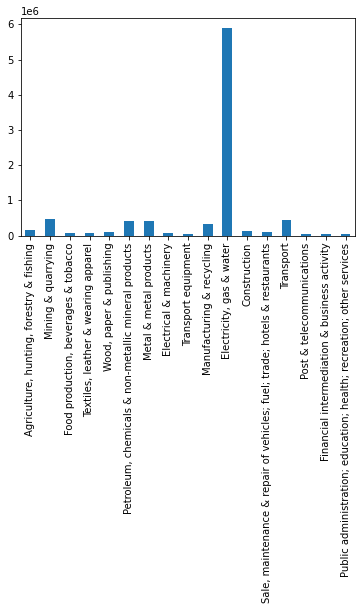

In [88]:
Array.plot(kind='bar')

Calculate the carbon footprint of all products in final consumption. Develop a figure that shows the total carbon footprint for all the 17 products, i.e. per product.

<AxesSubplot:>

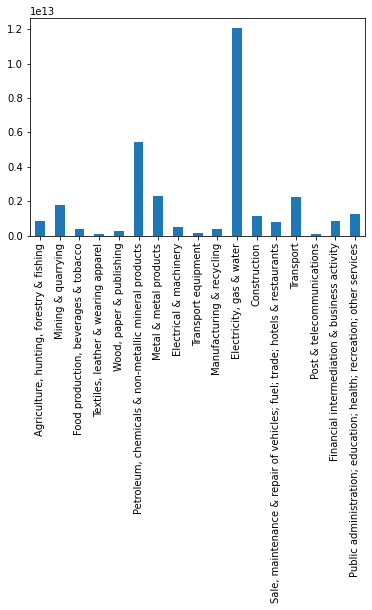

In [89]:
#since we are looking for the total figure and not the per unit figure we will look in the F matrix

#Start of by creating a Total row 
F.loc['Carbon_Footprint']= F.sum()

#Then we can plot this row
F.loc['Carbon_Footprint'].plot(kind='bar')

What was the carbon footprint of different final consumers, i.e. different columns in the Y matrix? 

<AxesSubplot:>

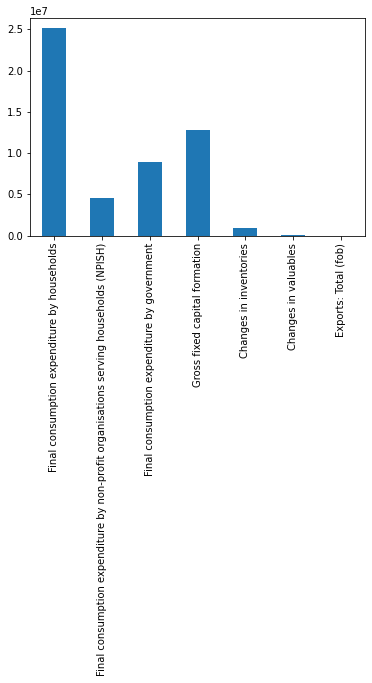

In [90]:
#we will look in the Y matrix

#Start of by creating a Total row 
Y.loc['Carbon_Footprint']= Y.sum()

#Then we can plot this row
Y.loc['Carbon_Footprint'].plot(kind='bar')